In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from scikitplot.metrics import plot_ks_statistic
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, f1_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_excel('credit_data.xlsx')

In [3]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
credit['Job_des'] = credit['Job'].map({0:'unskilled_no_resident',1:'unskilled_resident',2:'skilled',3:'highly_skilled'})

In [6]:
credit.pivot_table(index='Risk',columns='Saving accounts', values='Job_des',aggfunc='count')

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [7]:
credit.pivot_table(index='Risk',columns='Checking account', values='Job_des',aggfunc='count')

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [8]:
credit['Checking account'] = np.where(credit['Checking account'].isnull(),
                                          np.where(credit['Risk']=='bad','little','moderate'),
                                          credit['Checking account'])

In [9]:
credit['Saving accounts'] = np.where(credit['Saving accounts'].isnull(),
                                          'little',
                                          credit['Saving accounts'])

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Job_des           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [11]:
cols = list(credit.drop('Risk', axis=1).columns)

In [12]:
cat_cols = list(credit[cols].select_dtypes(include='object').columns)

In [13]:
credit_2 = credit.copy()

In [14]:
def encode_cat(data, columnas_categoricas):
    
    
    for i in columnas_categoricas:
        df2 = pd.get_dummies(data[i], prefix=i)
        data.drop(i, axis=1,inplace=True)
        data = pd.concat([data,df2], axis=1)
    return data

In [15]:
credit_df = encode_cat(credit_2,cat_cols)

In [16]:
X = credit_df.drop(['Risk', 'Job'],axis=1)
y = credit_df['Risk']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=111)

In [18]:
LG = LogisticRegression()

LG.fit(X_train,y_train)

pred_lg = LG.predict(X_test)

In [19]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

         bad       0.62      0.45      0.52        88
        good       0.80      0.88      0.84       212

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.74      0.76      0.74       300



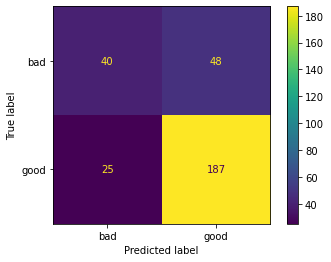

In [20]:
cm = confusion_matrix(y_test,pred_lg)
ConfusionMatrixDisplay(cm, display_labels = LG.classes_).plot()
plt.show()

In [21]:
result = []

for k in range(2,15):
    sm = SMOTE(k_neighbors=k)
    X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
    LG_sm = LogisticRegression()
    LG_sm.fit(X_train_sm,y_train_sm)
    pred_lg_sm = LG_sm.predict(X_test)
    recall_ = recall_score(y_test,pred_lg_sm, pos_label="bad")
    f1_ = f1_score(y_test,pred_lg_sm, pos_label="bad")
    result.append([recall_,f1_])
    

In [22]:
result_df = pd.DataFrame(result, columns = ['Recall', 'F1'])

result_df.head()

,Recall,F1
0,0.522727,0.557576
1,0.534091,0.562874
2,0.522727,0.557576
3,0.522727,0.557576
4,0.590909,0.597701


<AxesSubplot:>

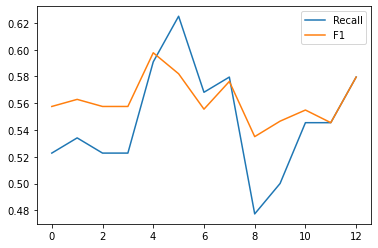

In [23]:
result_df.plot()

In [24]:
sm = SMOTE(k_neighbors=7)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [25]:
LG_sm = LogisticRegression()

LG_sm.fit(X_train_sm,y_train_sm)

pred_lg_sm = LG_sm.predict(X_test)

In [26]:
print(classification_report(y_test,pred_lg_sm))

              precision    recall  f1-score   support

         bad       0.58      0.55      0.56        88
        good       0.82      0.83      0.83       212

    accuracy                           0.75       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.75      0.75      0.75       300



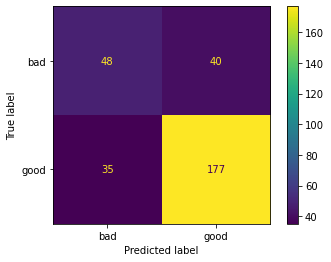

In [27]:
cm = confusion_matrix(y_test,pred_lg_sm)
ConfusionMatrixDisplay(cm, display_labels = LG_sm.classes_).plot()
plt.show()

In [28]:
df_test = pd.DataFrame()
df_test['y_test'] = y_test
df_test['predicciones_test'] = LG_sm.predict(X_test)
df_test['proba_default_test'] = LG_sm.predict_proba(X_test)[:,0]
df_test['proba_no_default_test'] = LG_sm.predict_proba(X_test)[:,1]
df_test['predicciones_test'] = df_test['predicciones_test'].map({'bad':0,'good':1})
df_test['y_test'] = df_test['y_test'].map({'bad':0,'good':1})

In [29]:
print(roc_auc_score(df_test['y_test'],df_test['predicciones_test']))

0.690180102915952


Text(0.5, 1.0, 'ROC curve')

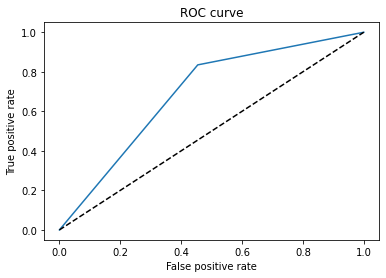

In [30]:
fpr, tpr, thresholds = roc_curve(df_test['y_test'], df_test['predicciones_test'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Text(0.5, 1.0, 'Gini')

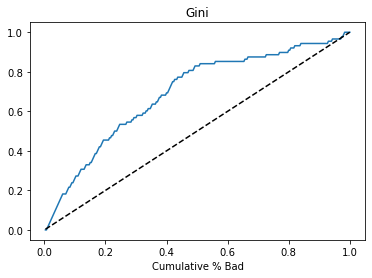

In [31]:
df_gini_test = df_test[['y_test',
                         'proba_no_default_test',
                         'predicciones_test']].sort_values(by='proba_no_default_test')

df_gini_test = df_gini_test.reset_index()
df_gini_test['Cumulative N Population'] = df_gini_test.index + 1
df_gini_test['Cumulative N Good'] = df_gini_test['y_test'].cumsum()
df_gini_test['Cumulative N Bad'] = df_gini_test['Cumulative N Population'] - df_gini_test['y_test'].cumsum()
df_gini_test['Cumulative Perc Population'] = df_gini_test['Cumulative N Population'] / (df_gini_test.shape[0])
df_gini_test['Cumulative Perc Good'] = df_gini_test['Cumulative N Good'] / df_gini_test['y_test'].sum()
df_gini_test['Cumulative Perc Bad'] = df_gini_test['Cumulative N Bad'] / (df_gini_test.shape[0] - df_gini_test['y_test'].sum())
plt.plot(df_gini_test['Cumulative Perc Population'],df_gini_test['Cumulative Perc Bad'])
plt.plot(df_gini_test['Cumulative Perc Population'],df_gini_test['Cumulative Perc Population'], linestyle='--', color='k')
plt.xlabel('Cumulative % Population')
plt.xlabel('Cumulative % Bad')
plt.title('Gini')

In [32]:
Gini_test = (roc_auc_score(df_gini_test['y_test'], df_gini_test['predicciones_test']) * 2) - 1
print(Gini_test)

0.380360205831904


Text(0.5, 1.0, 'Kolmogorov-Smirnov')

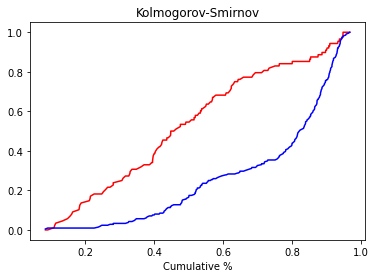

In [33]:
plt.plot(df_gini_test['proba_no_default_test'], df_gini_test['Cumulative Perc Bad'], color='r')
plt.plot(df_gini_test['proba_no_default_test'], df_gini_test['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for being Good')
plt.xlabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [34]:
ks_test = max(df_gini_test['Cumulative Perc Bad'] - df_gini_test['Cumulative Perc Good'])
print(ks_test)

0.4794168096054888


In [35]:
#plot_ks_statistic(df_test['y_test'], df_test[['proba_default_test','proba_no_default_test']])

In [36]:
coeficientes = pd.DataFrame(LG_sm.coef_).transpose()
coeficientes['variables'] = X.columns
coeficientes.columns = ['coeficiente', 'variable']
coeficientes = coeficientes.sort_values(by='coeficiente',ascending=False)
coeficientes

,coeficiente,variable
13,1.705635,Checking account_moderate
4,1.072320,Sex_male
20,1.017806,Purpose_radio/TV
23,0.847682,Job_des_highly_skilled
16,0.818584,Purpose_car
5,0.604124,Housing_free
3,0.531510,Sex_female
7,0.529810,Housing_rent
6,0.504870,Housing_own
19,0.463105,Purpose_furniture/equipment


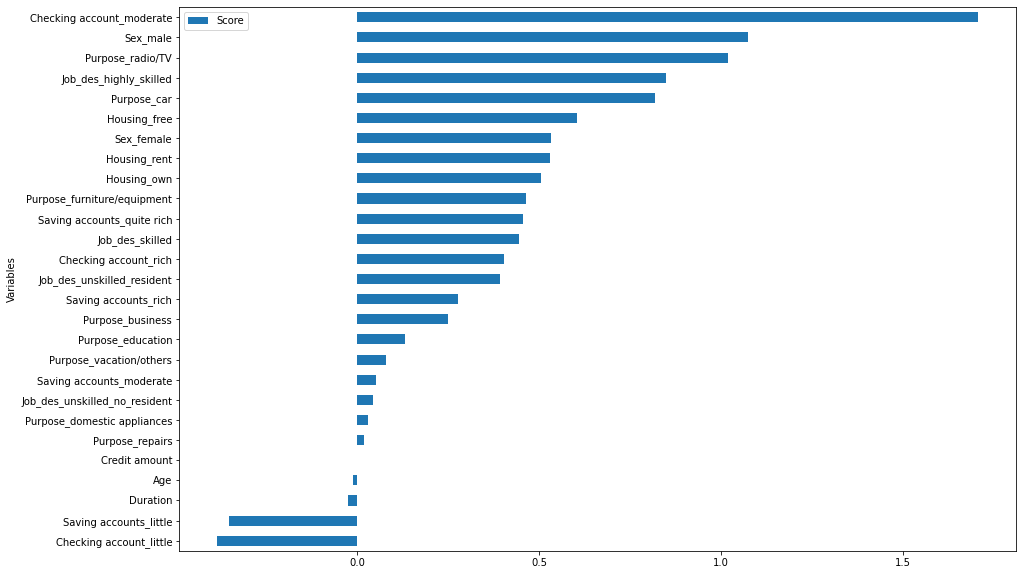

In [37]:
impacto = pd.DataFrame()
impacto['Variables'] = X.columns
impacto['Score'] = pd.DataFrame(LG_sm.coef_).transpose()
impacto.sort_values(by='Score',ascending=True).plot(x='Variables',y='Score',kind='barh',figsize=(15, 10))

plt.show()

In [38]:
df_test

,y_test,predicciones_test,proba_default_test,proba_no_default_test
190,0,0,0.577682,0.422318
104,1,1,0.087780,0.912220
295,0,0,0.664891,0.335109
12,1,1,0.103134,0.896866
87,0,0,0.585747,0.414253
...,...,...,...,...
354,1,1,0.068912,0.931088
831,0,0,0.553260,0.446740
638,1,1,0.116932,0.883068
158,1,1,0.110037,0.889963


In [39]:
true_list = pd.DataFrame(y_test, columns = ['Risk'])
test_pred_df = df_test.drop(columns = 'proba_no_default_test').reset_index(drop = True)
print(test_pred_df['proba_default_test'].describe())

count    300.000000
mean       0.332254
std        0.243199
min        0.031862
25%        0.116697
50%        0.239204
75%        0.521428
max        0.916314
Name: proba_default_test, dtype: float64


In [40]:
test_pred_df.head()

,y_test,predicciones_test,proba_default_test
0,0,0,0.577682
1,1,1,0.087780
2,0,0,0.664891
3,1,1,0.103134
4,0,0,0.585747


In [41]:
# Umbral para una tasa de aceptación del 85 %
threshold_85 = np.quantile(test_pred_df['proba_default_test'], 0.85)

# Umbral de tasa de aceptación
test_pred_df['pred_loan_status'] = test_pred_df['proba_default_test'].apply(lambda x: 0 if x >= threshold_85 else 1)

# Recuentos del estado del préstamo después del umbral
print(test_pred_df['pred_loan_status'].value_counts())

1    255
0     45
Name: pred_loan_status, dtype: int64


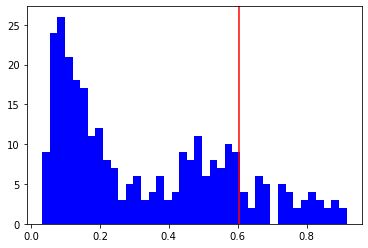

In [42]:
# Histograma de las probabilidades previstas de incumplimiento
plt.hist(test_pred_df['proba_default_test'], color = 'blue', bins = 40)

# Línea de referencia al gráfico para el umbral
plt.axvline(x = threshold_85, color = 'red')
plt.show()

In [43]:
test_pred_df

,y_test,predicciones_test,proba_default_test,pred_loan_status
0,0,0,0.577682,1
1,1,1,0.087780,1
2,0,0,0.664891,0
3,1,1,0.103134,1
4,0,0,0.585747,1
...,...,...,...,...
295,1,1,0.068912,1
296,0,0,0.553260,1
297,1,1,0.116932,1
298,1,1,0.110037,1


In [44]:
# Subconjunto de solo préstamos aceptados
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 1]

# Cálculo de la baja tasa
print('Aceptando el 85% de los Préstamos')
print(1 - (np.sum(accepted_loans['y_test']) / accepted_loans['y_test'].count()))

print('Aceptando todos los Préstamos')
print(1 - (np.sum(test_pred_df['y_test']) / test_pred_df['y_test'].count()))

Aceptando el 85% de los Préstamos
0.22745098039215683
Aceptando todos los Préstamos
0.29333333333333333


In [45]:
accepted_loans

,y_test,predicciones_test,proba_default_test,pred_loan_status
0,0,0,0.577682,1
1,1,1,0.087780,1
3,1,1,0.103134,1
4,0,0,0.585747,1
5,1,1,0.148788,1
...,...,...,...,...
293,1,1,0.138084,1
295,1,1,0.068912,1
296,0,0,0.553260,1
297,1,1,0.116932,1


In [46]:
test_pred_df = test_pred_df.rename(columns={'pred_loan_status':'pred_loan_status_15'}, inplace=False)
test_pred_df['Credit amount'] = X_test['Credit amount'].reset_index(drop = True)
test_pred_df

,y_test,predicciones_test,proba_default_test,pred_loan_status_15,Credit amount
0,0,0,0.577682,1,4591
1,1,1,0.087780,1,2445
2,0,0,0.664891,0,9960
3,1,1,0.103134,1,1567
4,0,0,0.585747,1,12612
...,...,...,...,...,...
295,1,1,0.068912,1,727
296,0,0,0.553260,1,1216
297,1,1,0.116932,1,1493
298,1,1,0.110037,1,3512


In [47]:
print(test_pred_df['Credit amount'].describe())

count      300.000000
mean      3234.290000
std       2771.654104
min        276.000000
25%       1380.000000
50%       2356.500000
75%       3817.750000
max      15653.000000
Name: Credit amount, dtype: float64


In [48]:
# Almacenar el monto promedio del préstamo
avg_loan = np.mean(test_pred_df['Credit amount'])

# Formato de moneda y tabulación cruzada
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['y_test'], 
                  test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

pred_loan_status_15          0           1
y_test                                    
0                   $97,028.70 $187,588.82
1                   $48,514.35 $637,155.13


In [49]:
#la morosidad del 21%  implica unos 42,045 dolares

In [50]:
# Matriz de tazas de aceptación
accept_rates = [1.0,
 0.95,
 0.9,
 0.85,
 0.8,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.5,
 0.45,
 0.4,
 0.35,
 0.3,
 0.25,
 0.2,
 0.15,
 0.1,
 0.05]

In [51]:
# Matriz de umbrales
thresholds = []

# Matriz de bajas tazas de aceptación
bad_rates = []

test_pred_df = test_pred_df.rename(columns={'pred_loan_status_15':'pred_loan_status'}, inplace=False)
test_pred_df

,y_test,predicciones_test,proba_default_test,pred_loan_status,Credit amount
0,0,0,$0.58,1,4591
1,1,1,$0.09,1,2445
2,0,0,$0.66,0,9960
3,1,1,$0.10,1,1567
4,0,0,$0.59,1,12612
...,...,...,...,...,...
295,1,1,$0.07,1,727
296,0,0,$0.55,1,1216
297,1,1,$0.12,1,1493
298,1,1,$0.11,1,3512


In [52]:
# Prestamos aceptados
accepted_loans = accepted_loans[0:0]

# Número de prestamos aceptados
num_accepted_loans = []

In [53]:
# Matrices de la tabla de estrategia con un bucle for
for rate in accept_rates:
    # Umbral para la tasa de aceptación
    thresh = np.quantile(df_test['proba_default_test'], rate).round(3)
    # Agregación del valor del umbral a la lista de umbrales
    thresholds.append(np.quantile(df_test['proba_default_test'], rate).round(3))
    # Reasignación del valor del estado del préstamo usando el umbral
    test_pred_df['pred_loan_status'] = test_pred_df['proba_default_test'].apply(lambda x: 0 if x > thresh else 1)
    # Conjunto de préstamos aceptados usando esta tasa de aceptación
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 1]
    # Calculo y asignación de la tasa baja usando la tasa de aceptación
    bad_rates.append(1 - (np.sum((accepted_loans['y_test']) / accepted_loans['y_test'].count())).round(3))
    # Numero de prestamos aceptados
    num_accepted_loans.append(len(test_pred_df[test_pred_df['proba_default_test']<np.quantile(test_pred_df['proba_default_test'], rate).round(3)]))

In [54]:
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns = ['Acceptance Rate','Threshold','Bad Rate'])
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,$1.00,$0.92,$0.29
1,$0.95,$0.79,$0.26
2,$0.90,$0.69,$0.24
3,$0.85,$0.60,$0.23
4,$0.80,$0.57,$0.20
5,$0.75,$0.52,$0.18
6,$0.70,$0.48,$0.18
7,$0.65,$0.45,$0.17
8,$0.60,$0.39,$0.15
9,$0.55,$0.31,$0.12


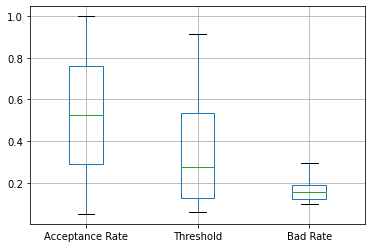

In [55]:
# Diagrama de caja de la tabla de estrategia comercial
strat_df.boxplot()
plt.show()

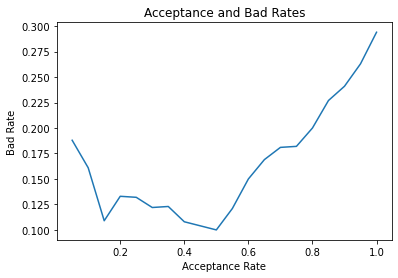

In [56]:
# Gráfico de la curva de estrategia
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.show()

In [57]:
# Monto promedio del prestamo
mean_loan_amnt = np.mean(test_pred_df['Credit amount'])

In [58]:
strat_df = pd.DataFrame()

strat_df['Acceptance Rate'] = accept_rates
strat_df['Thresholds'] = thresholds
strat_df['Bad Rate'] = bad_rates
strat_df['Num Accepted Loans'] = num_accepted_loans
strat_df['Avg Loan Amnt'] = mean_loan_amnt

In [59]:
# El valor neto estimado de los no impagos menos los impagos
estimated_value = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) - (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])

In [60]:
# Marco de datos de la tabla de estrategia comercial con el valor neto
strat_df['Estimated Value'] = estimated_value

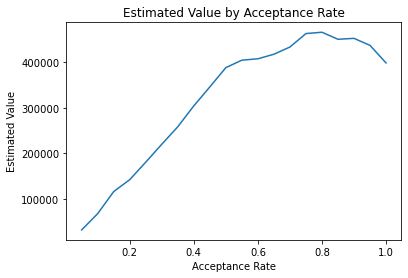

In [61]:
# Gráfico con los valores estimados
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.show()

In [62]:
# Fila con el valor máximo estimado
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Thresholds  Bad Rate  Num Accepted Loans  Avg Loan Amnt  \
4            $0.80       $0.57     $0.20                 240      $3,234.29   

   Estimated Value  
4      $465,737.76  


In [63]:
# Suposición de que la exposición es el valor total del préstamo y que la pérdida en caso de incumplimiento es del 100 %.
test_pred_df['pred_loan_status'] = 1
test_pred_df = test_pred_df.rename(columns={'pred_loan_status':'loss_given_default'}, inplace=False)
test_pred_df

,y_test,predicciones_test,proba_default_test,loss_given_default,Credit amount
0,0,0,$0.58,1,4591
1,1,1,$0.09,1,2445
2,0,0,$0.66,1,9960
3,1,1,$0.10,1,1567
4,0,0,$0.59,1,12612
...,...,...,...,...,...
295,1,1,$0.07,1,727
296,0,0,$0.55,1,1216
297,1,1,$0.12,1,1493
298,1,1,$0.11,1,3512


In [64]:
# Pérdida esperada del banco
test_pred_df['expected_loss'] = test_pred_df['proba_default_test'] * test_pred_df['loss_given_default'] * test_pred_df['Credit amount']

# Pérdida total esperada con dos decimales
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Pérdida total esperada
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $410,343.14


In [65]:
sum(test_pred_df['Credit amount'])

970287